In [1]:
from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np

import fastsca

import _pnmf,_dcpnmf,_dcpnmfb,_dcpnmfv2
np.random.seed(42)

import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc
import _topics_util


experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

sca = fastsca.FASTSCA()
sca.config = args
sca.initdata()
fn = sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id

In [2]:
df_bd = pd.read_csv(fn+'_depth.csv.gz')
df_bf = pd.read_csv(fn+'_freq.csv.gz')
df_bbeta = pd.read_csv(fn+'_beta.csv.gz')
df_btheta = pd.read_csv(fn+'_theta.csv.gz')

df_scd = pd.read_csv(fn+'_sc_depth.csv.gz')
df_scf = pd.read_csv(fn+'_sc_freq.csv.gz')
df_scbeta = pd.read_csv(fn+'_sc_beta.csv.gz')
df_sctheta = pd.read_csv(fn+'_sc_theta.csv.gz')
df_btheta = df_btheta.rename(columns={'Unnamed: 0':'cell'})
df_bbeta = df_bbeta.rename(columns={'Unnamed: 0':'topic'})
df_sctheta = df_sctheta.rename(columns={'Unnamed: 0':'cell'})
df_scbeta = df_scbeta.rename(columns={'Unnamed: 0':'topic'})

df_bulk_b = pd.read_csv(fn+'_bulk_trace.csv.gz')
df_sc_b = pd.read_csv(fn+'_sc_bulk_trace.csv.gz')
df_scbulk_b = pd.read_csv(fn+'_sc_trace.csv.gz')


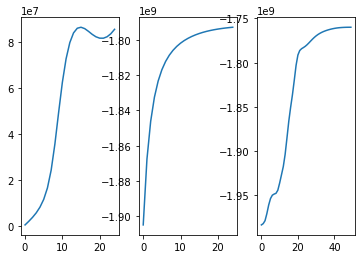

In [3]:
figure,axis = plt.subplots(1,3)
axis[0].plot(df_bulk_b.iloc[:,1].values)
axis[1].plot(df_scbulk_b.iloc[:,1].values)
axis[2].plot(df_sc_b.iloc[:,1].values)

In [4]:
df_pl = pd.read_csv(sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id+'_prior_label.csv.gz')
df_pl.columns = ['cell','cell_type']
df_pl

,cell,cell_type
0,CID3586_AAGACCTCAGCATGAG,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,Endothelial
3,CID3586_ACCCACTAGATGTCGG,Endothelial
4,CID3586_ACTGATGGTCAACTGT,Endothelial
...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,Myeloid


In [11]:
import umap

# df_umap= pd.DataFrame()
# df_umap['cell'] = df_sctheta['cell']
# df_umap['topic_sc'] = [x for x in df_sctheta.iloc[:,1:].idxmax(axis=1)]
# df_umap['topic_bulk'] = [x for x in df_btheta.iloc[:,1:].idxmax(axis=1)]

# umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
# proj_2d = umap_2d.fit(df_sctheta.iloc[:,1:])
# df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
# df_umap

df_umap = pd.read_csv(sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id+'_sc_umap.csv')
df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
df_umap['topic_sc'] = [x for x in df_sctheta.iloc[:,1:].idxmax(axis=1)]
df_umap['topic_bulk'] = [x for x in df_btheta.iloc[:,1:].idxmax(axis=1)]

df_umap

,cell,umap1,umap2,topic_sc,topic_bulk
0,CID3586_AAGACCTCAGCATGAG,-6.434021,-8.326559,4,5
1,CID3586_AAGGTTCGTAGTACCT,-5.774728,-8.612617,4,5
2,CID3586_ACCAGTAGTTGTGGCC,-5.735215,-8.406620,4,5
3,CID3586_ACCCACTAGATGTCGG,-5.787925,-8.516517,4,9
4,CID3586_ACTGATGGTCAACTGT,-8.323321,-9.292438,4,2
...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,0.923803,0.487602,0,0
100060,CID4398_TCTATTGTCGCCATAA,-6.480211,4.293941,6,7
100061,CID4398_TCTTTCCCAGTAAGCG,-6.364000,5.683453,0,7
100062,CID4398_TGCCCATGTTACGGAG,-6.349754,4.568035,6,7


In [12]:
df_umap = pd.merge(df_umap,df_pl[['cell','cell_type']],on='cell',how='left')
df_umap = df_umap[~df_umap['cell_type'].isna()]
df_umap

,cell,umap1,umap2,topic_sc,topic_bulk,cell_type
0,CID3586_AAGACCTCAGCATGAG,-6.434021,-8.326559,4,5,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,-5.774728,-8.612617,4,5,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,-5.735215,-8.406620,4,5,Endothelial
3,CID3586_ACCCACTAGATGTCGG,-5.787925,-8.516517,4,9,Endothelial
4,CID3586_ACTGATGGTCAACTGT,-8.323321,-9.292438,4,2,Endothelial
...,...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,0.923803,0.487602,0,0,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,-6.480211,4.293941,6,7,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,-6.364000,5.683453,0,7,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,-6.349754,4.568035,6,7,Myeloid


Text(0, 0.5, 'UMAP2')

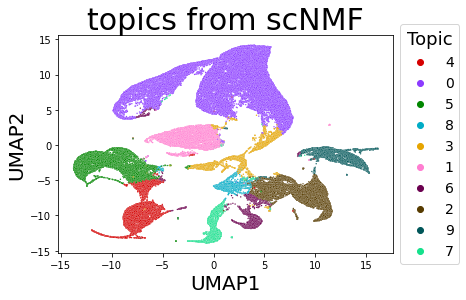

In [13]:
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_sc'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_sc',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from scNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

Text(0, 0.5, 'UMAP2')

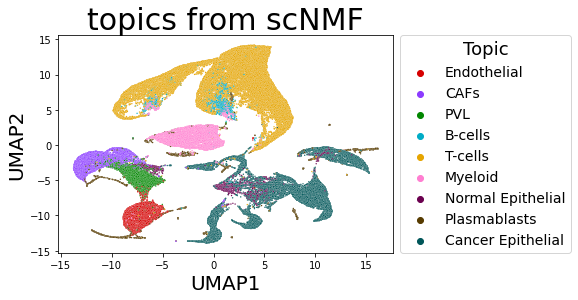

In [14]:
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from scNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

Text(0, 0.5, 'UMAP2')

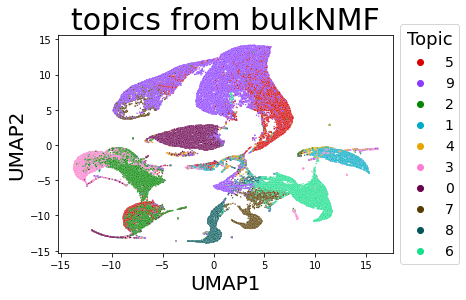

In [15]:
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_bulk'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_bulk',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from bulkNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

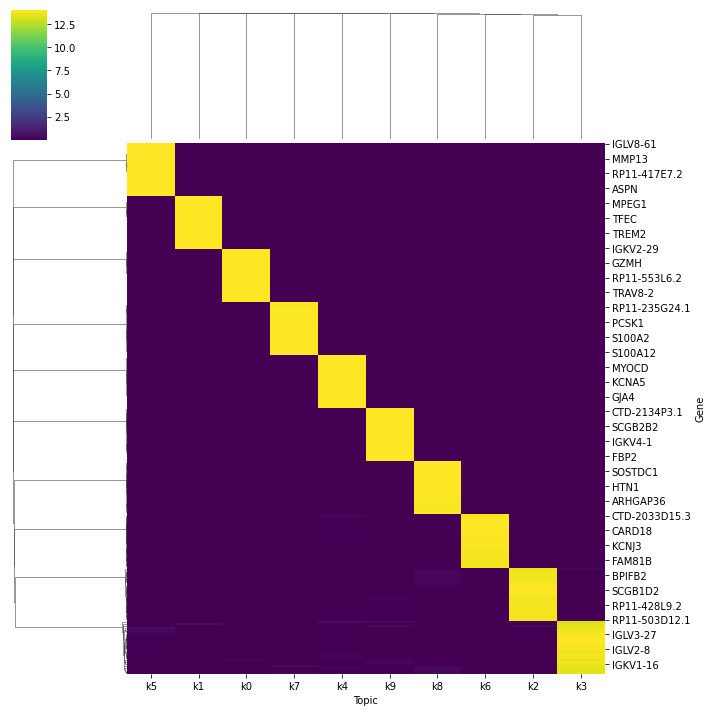

In [16]:
df_top = _topics_util.get_topic_top_genes(df_scbeta,top_n=25)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

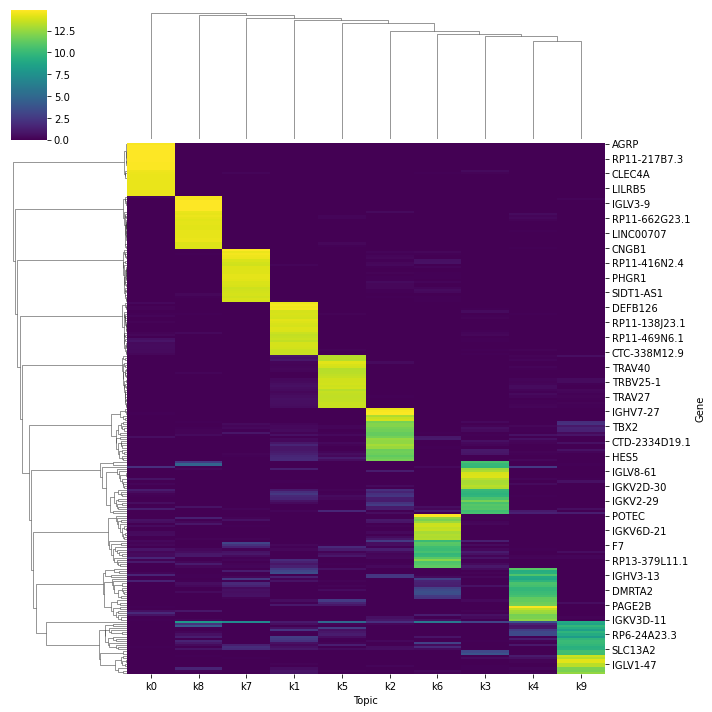

In [17]:
df_top = _topics_util.get_topic_top_genes(df_bbeta,top_n=25)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')